아디다스 판매 전략

데이터셋: Adidas US sales Dataset (kaggle)
설명: 미국의 지역별/판매 브랜드별/상품별/채널별 수량과 매출, 이익을 확인하고, 이를 최대화할 수 있는 방안 모색
진행 절차 및 내용
- 판매 데이터를 로딩하여 각 컬럼별 EDA 및 결측치 처리
- 비교 기준 수립: 판매 일자
- 지역별 실적 분석 (region, state, city)
- 판매 브랜드별 실적 분석 (retailer)
- 판매 채널별 실적 분석 (Sales Method)
- 상품별 실적 분석 (product)
사용한 스킬셋

In [1]:
# 데이터 로딩 및 확인
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_excel('Adidas US sales Datasets.xlsx', header=4)
df.drop(['Unnamed: 0', 'Total Sales', 'Operating Profit'], axis=1, inplace=True)
df['Total Sales'] = df['Price per Unit']*df['Units Sold']
df['Operating Profit'] = df['Price per Unit']*df['Units Sold']*df['Operating Margin']
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Operating Margin,Sales Method,Total Sales,Operating Profit
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,0.50,In-store,60000.0,30000.00
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,0.30,In-store,50000.0,15000.00
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,0.35,In-store,40000.0,14000.00
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,0.35,In-store,38250.0,13387.50
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,0.30,In-store,54000.0,16200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,0.28,Outlet,3200.0,896.00
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,0.32,Outlet,4305.0,1377.60
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,0.37,Outlet,7544.0,2791.28
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,0.42,Outlet,2940.0,1234.80


KeyError: 'Invoice Date'

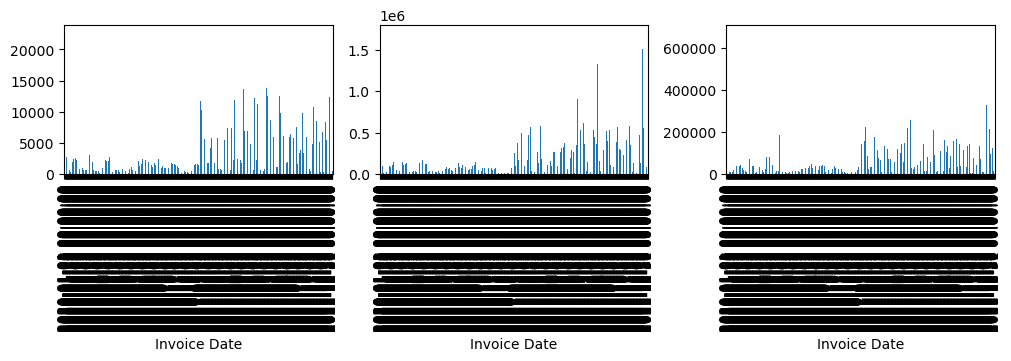

In [15]:
# 1. 일자 (Invoice Date)
date_df = df.groupby("Invoice Date").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
date_df['Units Sold'].plot(kind='bar', ax=axes[0])
date_df['Total Sales'].plot(kind='bar', ax=axes[1])
date_df['Operating Profit'].plot(kind='bar', ax=axes[2])

# https://dyddl1993.tistory.com/38 --> 왜 안될까용
clrs = ['yellow' if (x.isoweekday()==6 | x.isoweekday()==7) else 'blue' for x in date_df['Invoice Date']]
sns.barplot(data=date_df, x='Invoice Date', y='Units Sold', plaette=clrs, alpha=1)

In [42]:
# 2. 지역 (region, state, city)
# 1) region
region = df.groupby('Region').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
region_date = df.groupby('Region')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
region_df = pd.merge(left=region, right=region_date, how='left', on='Region')

region_df['Units Sold_date'] = region_df['Units Sold']/region_df['Date Count']
region_df['Total Sales_date'] = region_df['Total Sales']/region_df['Date Count']
region_df['Operating Profit_date'] = region_df['Operating Profit']/region_df['Date Count']
region_df

,Units Sold,Total Sales,Operating Profit,Date Count,Units Sold_date,Total Sales_date,Operating Profit_date
Region,,,,,,,
Midwest,391337,16674434.0,6859945.23,281,1392.658363,59339.622776,24412.616477
Northeast,501279,25078267.0,9732773.90,224,2237.852679,111956.549107,43449.883482
South,492260,20603356.0,9221605.32,243,2025.761317,84787.473251,37948.993086
Southeast,407000,21374436.0,8393059.20,129,3155.038760,165693.302326,65062.474419
West,686985,36436157.0,13017584.05,419,1639.582339,86959.801909,31068.219690


<Axes: xlabel='Region'>

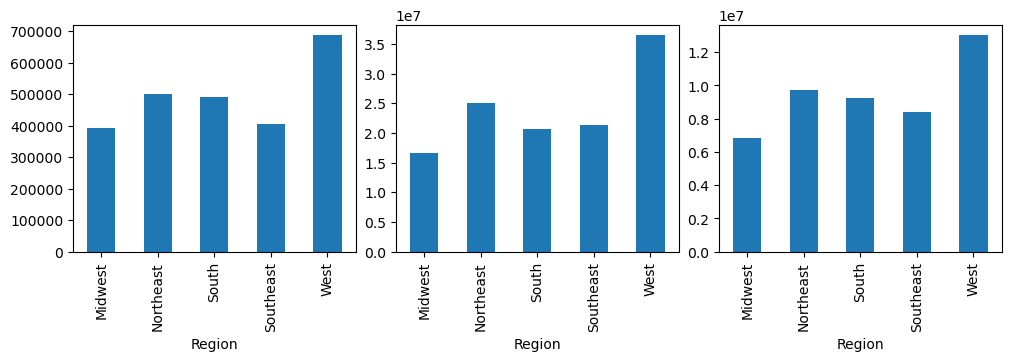

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
region_df['Units Sold'].plot(kind='bar', ax=axes[0])
region_df['Total Sales'].plot(kind='bar', ax=axes[1])
region_df['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Region'>

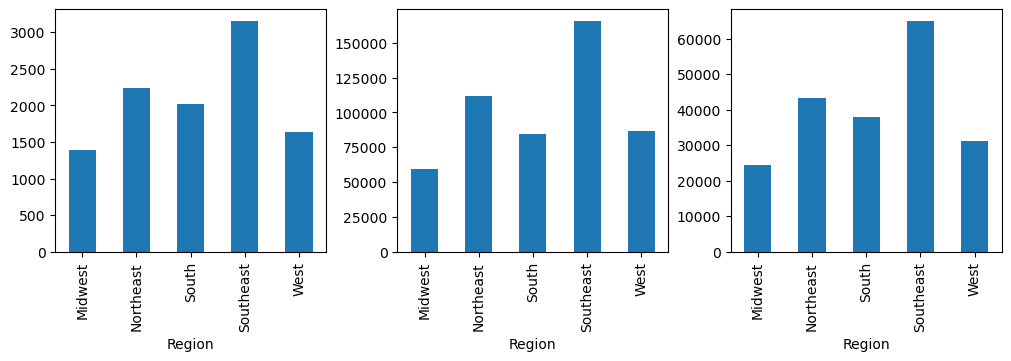

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
region_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
region_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
region_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

In [46]:
# 2) state (50일 이상 판매한 주들로 필터링)
state = df.groupby('State').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
state_date = df.groupby('State')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
state_df = pd.merge(left=state, right=state_date, how='left', on='State')

state_df['Units Sold_date'] = state_df['Units Sold']/state_df['Date Count']
state_df['Total Sales_date'] = state_df['Total Sales']/state_df['Date Count']
state_df['Operating Profit_date'] = state_df['Operating Profit']/state_df['Date Count']
state_df = state_df[state_df['Date Count']>=50]
state_df

,Units Sold,Total Sales,Operating Profit,Date Count,Units Sold_date,Total Sales_date,Operating Profit_date
State,,,,,,,
Alabama,63327,2513424.0,1368206.39,72,879.541667,34908.666667,19002.866528
California,163284,8580508.0,2960151.65,144,1133.916667,59586.861111,20556.608681
Colorado,41378,2569036.0,1000512.08,72,574.694444,35681.055556,13896.001111
Florida,133430,7820589.0,2921594.42,67,1991.492537,116725.208955,43605.886866
Illinois,25407,1204063.0,508648.61,72,352.875000,16723.097222,7064.564028
Maine,22410,1129728.0,417746.87,52,430.961538,21725.538462,8033.593654
Minnesota,20838,903918.0,347262.26,72,289.416667,12554.416667,4823.086944
Montana,42713,1930761.0,810775.05,72,593.236111,26816.125000,11260.764583
Nebraska,19154,728838.0,316805.91,72,266.027778,10122.750000,4400.082083


<Axes: xlabel='State'>

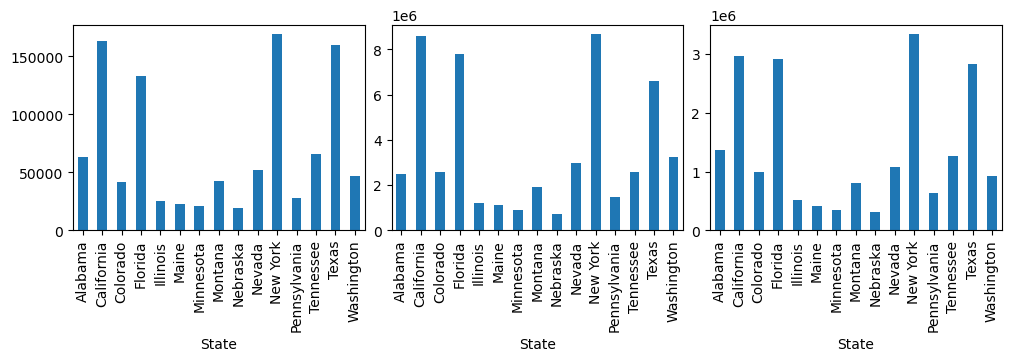

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
state_df['Units Sold'].plot(kind='bar', ax=axes[0])
state_df['Total Sales'].plot(kind='bar', ax=axes[1])
state_df['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='State'>

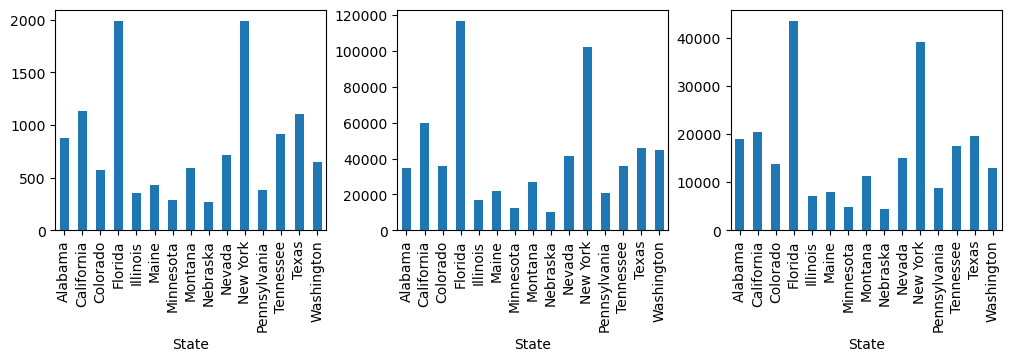

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
state_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
state_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
state_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

In [50]:
# 3) city (50일이상 판매한 도시로 필터링)
city = df.groupby('City').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
city_date = df.groupby('City')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
city_df = pd.merge(left=city, right=city_date, how='left', on='City')

city_df['Units Sold_date'] = city_df['Units Sold']/city_df['Date Count']
city_df['Total Sales_date'] = city_df['Total Sales']/city_df['Date Count']
city_df['Operating Profit_date'] = city_df['Operating Profit']/city_df['Date Count']
city_df = city_df[city_df['Date Count']>=50]
city_df

,Units Sold,Total Sales,Operating Profit,Date Count,Units Sold_date,Total Sales_date,Operating Profit_date
City,,,,,,,
Billings,42713,1930761.0,810775.05,72,593.236111,26816.125000,11260.764583
Birmingham,63327,2513424.0,1368206.39,72,879.541667,34908.666667,19002.866528
Chicago,25407,1204063.0,508648.61,72,352.875000,16723.097222,7064.564028
Dallas,69178,2982739.0,1337738.29,72,960.805556,41426.930556,18579.698472
Denver,41378,2569036.0,1000512.08,72,574.694444,35681.055556,13896.001111
Houston,90322,3629632.0,1494772.31,72,1254.472222,50411.555556,20760.726528
Knoxville,66077,2567190.0,1269585.06,72,917.736111,35655.416667,17633.125833
Las Vegas,51831,2981134.0,1084651.92,72,719.875000,41404.638889,15064.610000
Los Angeles,76384,3651288.0,1378158.34,72,1060.888889,50712.333333,19141.088056


<Axes: xlabel='City'>

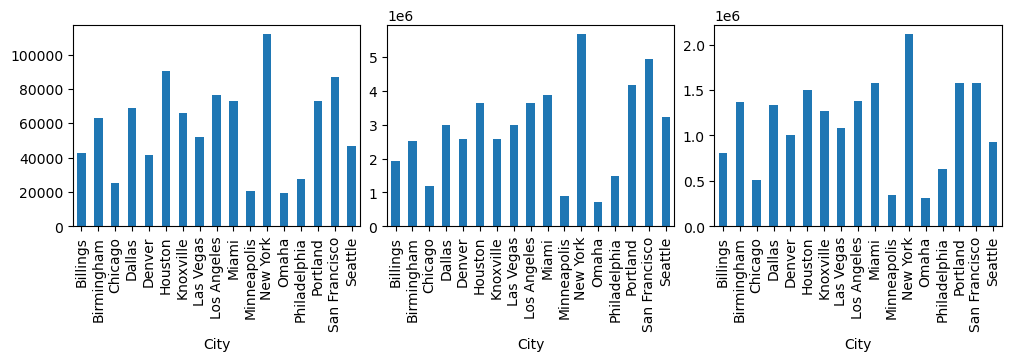

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
city_df['Units Sold'].plot(kind='bar', ax=axes[0])
city_df['Total Sales'].plot(kind='bar', ax=axes[1])
city_df['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='City'>

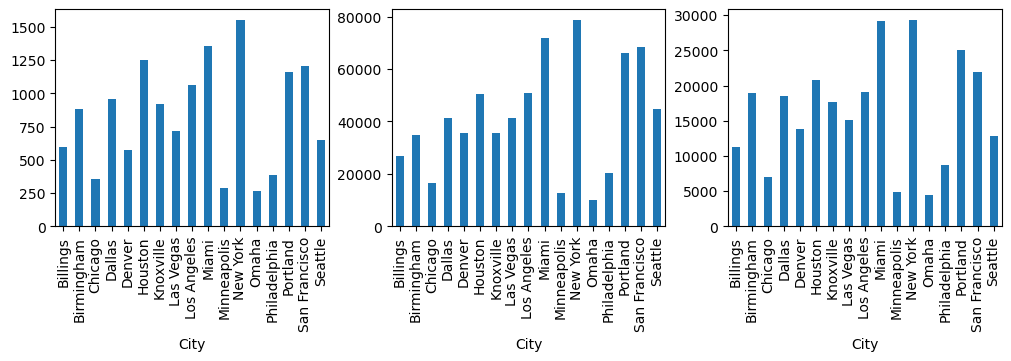

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
city_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
city_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
city_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

In [53]:
# 2. 판매 브랜드별 실적 분석 (retailer)
retailer = df.groupby('Retailer').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
retailer_date = df.groupby('Retailer')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
retailer_df = pd.merge(left=retailer, right=retailer_date, how='left', on='Retailer')

retailer_df['Units Sold_date'] = retailer_df['Units Sold']/retailer_df['Date Count']
retailer_df['Total Sales_date'] = retailer_df['Total Sales']/retailer_df['Date Count']
retailer_df['Operating Profit_date'] = retailer_df['Operating Profit']/retailer_df['Date Count']
retailer_df

,Units Sold,Total Sales,Operating Profit,Date Count,Units Sold_date,Total Sales_date,Operating Profit_date
Retailer,,,,,,,
Amazon,197990,10096987.0,3984432.06,103,1922.233010,98029.000000,38683.806408
Foot Locker,604369,29024945.0,11317027.31,364,1660.354396,79738.859890,31090.734368
Kohl's,287375,13512453.0,5182260.08,174,1651.580460,77657.775862,29783.103908
Sports Direct,557640,24616622.0,10641608.71,241,2313.858921,102143.659751,44156.052739
Walmart,206225,10506085.0,3902748.86,97,2126.030928,108310.154639,40234.524330
West Gear,625262,32409558.0,12196890.68,388,1611.500000,83529.788660,31435.285258


<Axes: xlabel='Retailer'>

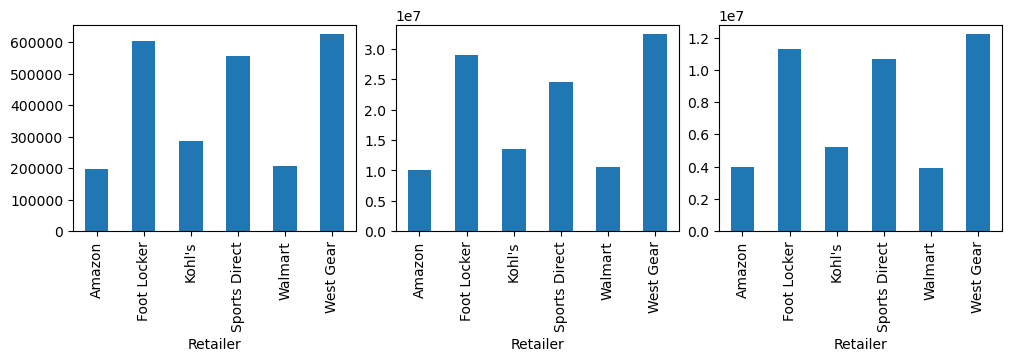

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
retailer_df['Units Sold'].plot(kind='bar', ax=axes[0])
retailer_df['Total Sales'].plot(kind='bar', ax=axes[1])
retailer_df['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Retailer'>

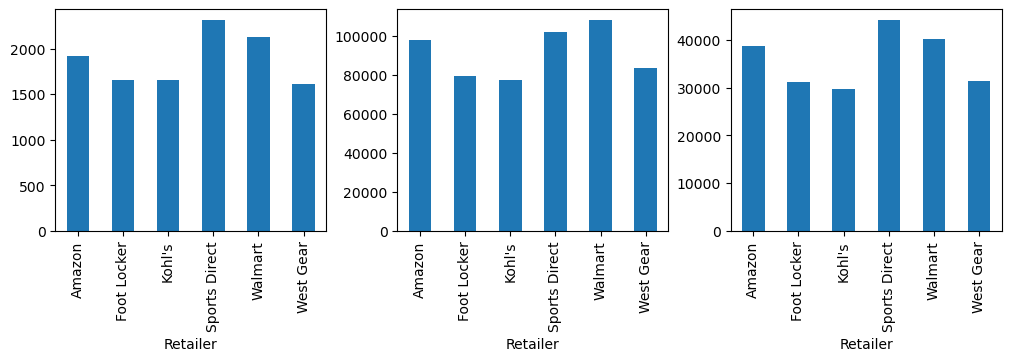

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
retailer_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
retailer_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
retailer_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

In [56]:
# 3. 판매 채널별 실적 분석 (Sales Method)
method = df.groupby('Sales Method').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
method_date = df.groupby('Sales Method')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
method_df = pd.merge(left=method, right=method_date, how='left', on='Sales Method')

method_df['Units Sold_date'] = method_df['Units Sold']/method_df['Date Count']
method_df['Total Sales_date'] = method_df['Total Sales']/method_df['Date Count']
method_df['Operating Profit_date'] = method_df['Operating Profit']/method_df['Date Count']
method_df

,Units Sold,Total Sales,Operating Profit,Date Count,Units Sold_date,Total Sales_date,Operating Profit_date
Sales Method,,,,,,,
In-store,689990,35664375.0,12759128.75,426,1619.694836,83719.190141,29951.006455
Online,939093,44965657.0,19552537.72,724,1297.089779,62107.261050,27006.267569
Outlet,849778,39536618.0,14913301.23,598,1421.033445,66114.745819,24938.630819


<Axes: xlabel='Sales Method'>

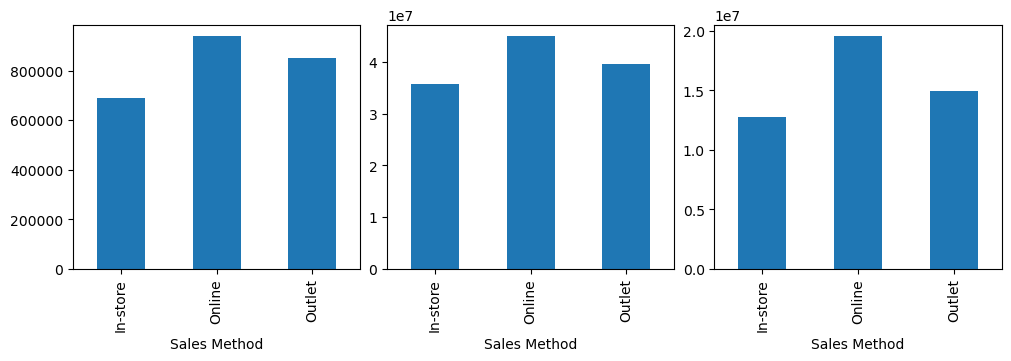

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
method_df['Units Sold'].plot(kind='bar', ax=axes[0])
method_df['Total Sales'].plot(kind='bar', ax=axes[1])
method_df['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Sales Method'>

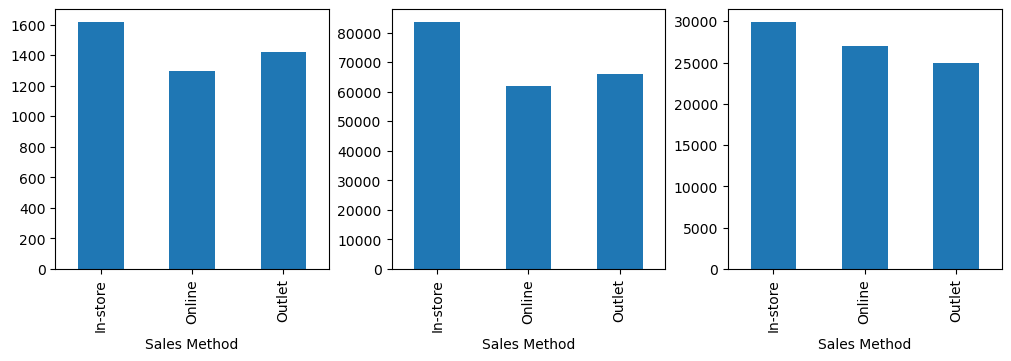

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
method_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
method_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
method_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

In [59]:
# 4. 상품별 실적 분석 (product)
product = df.groupby('Product').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
product_date = df.groupby('Product')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
product_df = pd.merge(left=product, right=product_date, how='left', on='Product')

product_df['Units Sold_date'] = product_df['Units Sold']/product_df['Date Count']
product_df['Total Sales_date'] = product_df['Total Sales']/product_df['Date Count']
product_df['Operating Profit_date'] = product_df['Operating Profit']/product_df['Date Count']
product_df

,Units Sold,Total Sales,Operating Profit,Date Count,Units Sold_date,Total Sales_date,Operating Profit_date
Product,,,,,,,
Men's Apparel,306683,16520632.0,6381405.33,364,842.535714,45386.351648,17531.333324
Men's Athletic Footwear,435526,20577180.0,7437456.94,356,1223.387640,57801.067416,20891.732978
Men's Street Footwear,593320,27680769.0,11629045.62,364,1630.000000,76046.068681,31947.927527
Women's Apparel,433827,23870985.0,9685220.56,355,1222.047887,67242.211268,27282.311437
Women's Athletic Footwear,317236,14315521.0,5597822.44,356,891.112360,40212.137640,15724.220337
Women's Street Footwear,392269,17201563.0,6494016.81,363,1080.630854,47387.225895,17889.853471


<Axes: xlabel='Product'>

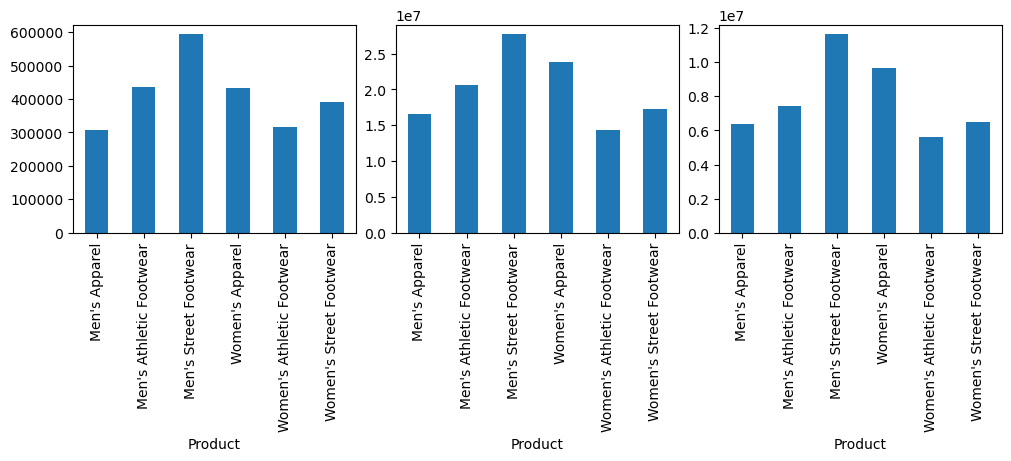

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
product_df['Units Sold'].plot(kind='bar', ax=axes[0])
product_df['Total Sales'].plot(kind='bar', ax=axes[1])
product_df['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

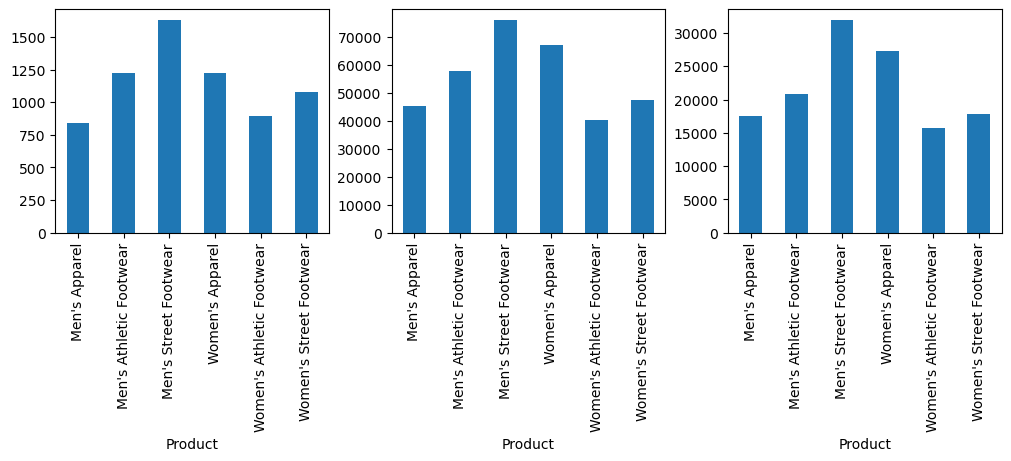

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
product_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
product_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
product_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Retailer'>

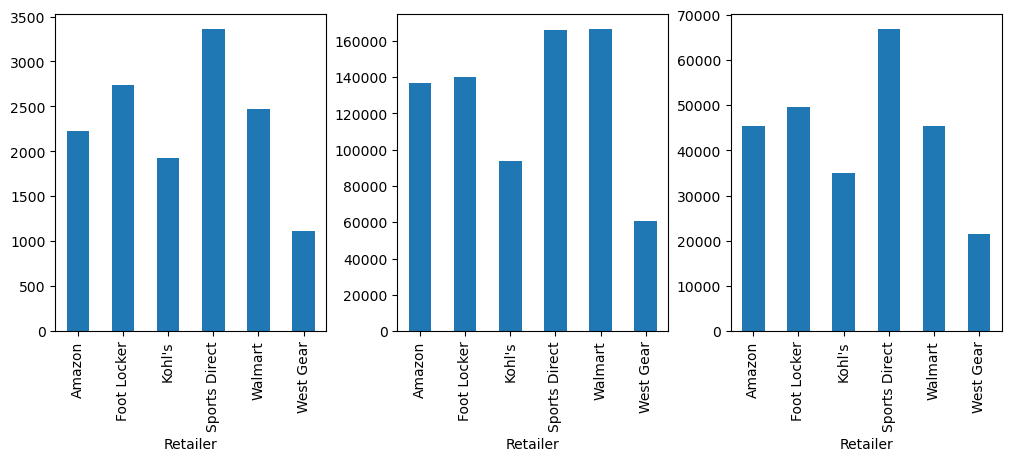

In [20]:
# 분석: 판매 전략
# 1. 지역별 매장
# 1) West > Sports Direct
west_retailer = df[df["Region"]=="West"].groupby('Retailer').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
west_retailer_date = df[df["Region"]=="West"].groupby('Retailer')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
west_retailer_df = pd.merge(left=west_retailer, right=west_retailer_date, how='left', on='Retailer')

west_retailer_df['Units Sold_date'] = west_retailer_df['Units Sold']/west_retailer_df['Date Count']
west_retailer_df['Total Sales_date'] = west_retailer_df['Total Sales']/west_retailer_df['Date Count']
west_retailer_df['Operating Profit_date'] = west_retailer_df['Operating Profit']/west_retailer_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
west_retailer_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
west_retailer_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
west_retailer_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Retailer'>

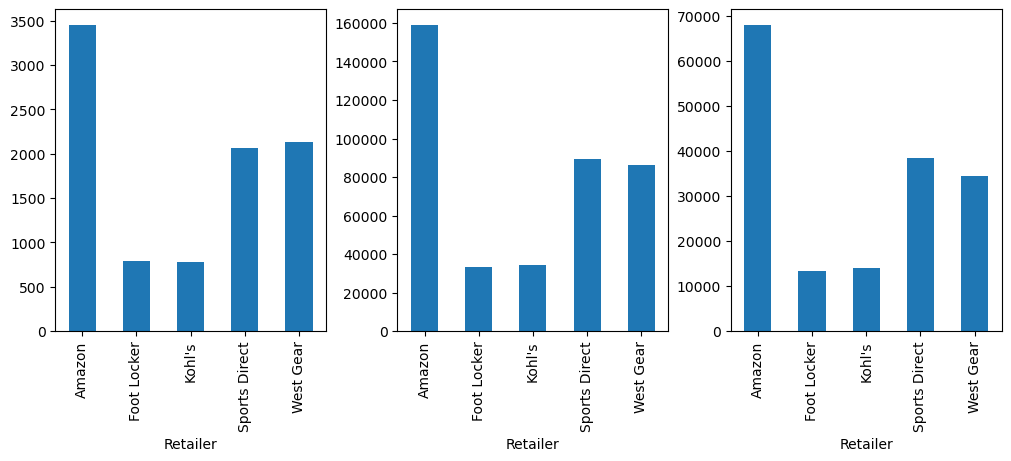

In [19]:
# 2) Midwest > Amazon
Midwest_retailer = df[df["Region"]=="Midwest"].groupby('Retailer').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Midwest_retailer_date = df[df["Region"]=="Midwest"].groupby('Retailer')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Midwest_retailer_df = pd.merge(left=Midwest_retailer, right=Midwest_retailer_date, how='left', on='Retailer')

Midwest_retailer_df['Units Sold_date'] = Midwest_retailer_df['Units Sold']/Midwest_retailer_df['Date Count']
Midwest_retailer_df['Total Sales_date'] = Midwest_retailer_df['Total Sales']/Midwest_retailer_df['Date Count']
Midwest_retailer_df['Operating Profit_date'] = Midwest_retailer_df['Operating Profit']/Midwest_retailer_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Midwest_retailer_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Midwest_retailer_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Midwest_retailer_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Retailer'>

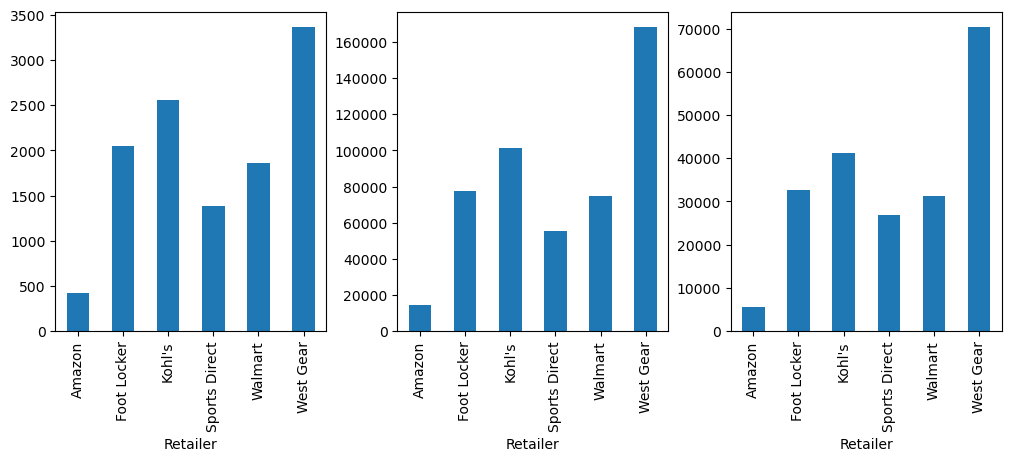

In [21]:
# 3) South > West Gear
South_retailer = df[df["Region"]=="South"].groupby('Retailer').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
South_retailer_date = df[df["Region"]=="South"].groupby('Retailer')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
South_retailer_df = pd.merge(left=South_retailer, right=South_retailer_date, how='left', on='Retailer')

South_retailer_df['Units Sold_date'] = South_retailer_df['Units Sold']/South_retailer_df['Date Count']
South_retailer_df['Total Sales_date'] = South_retailer_df['Total Sales']/South_retailer_df['Date Count']
South_retailer_df['Operating Profit_date'] = South_retailer_df['Operating Profit']/South_retailer_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
South_retailer_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
South_retailer_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
South_retailer_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Retailer'>

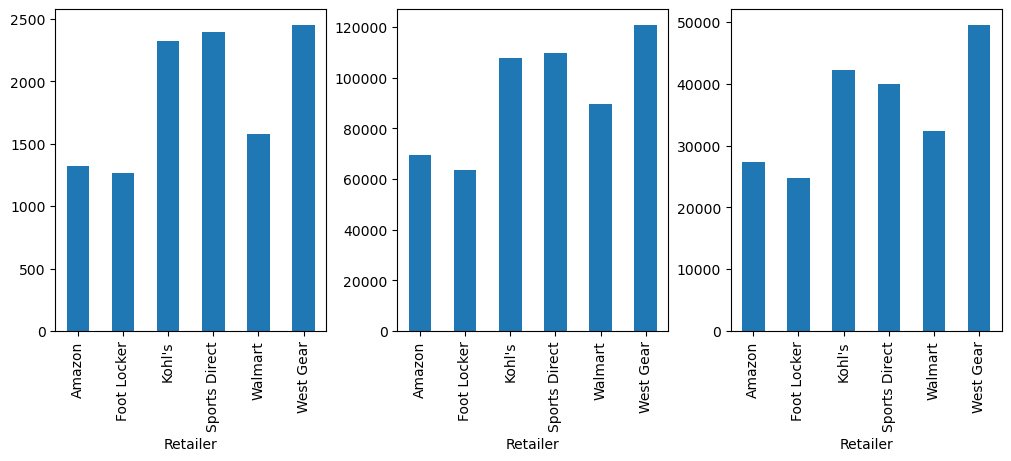

In [22]:
# 4) Northeast > West Gear / Sports Direct, Kohl's
Northeast_retailer = df[df["Region"]=="Northeast"].groupby('Retailer').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Northeast_retailer_date = df[df["Region"]=="Northeast"].groupby('Retailer')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Northeast_retailer_df = pd.merge(left=Northeast_retailer, right=Northeast_retailer_date, how='left', on='Retailer')

Northeast_retailer_df['Units Sold_date'] = Northeast_retailer_df['Units Sold']/Northeast_retailer_df['Date Count']
Northeast_retailer_df['Total Sales_date'] = Northeast_retailer_df['Total Sales']/Northeast_retailer_df['Date Count']
Northeast_retailer_df['Operating Profit_date'] = Northeast_retailer_df['Operating Profit']/Northeast_retailer_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Northeast_retailer_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Northeast_retailer_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Northeast_retailer_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Retailer'>

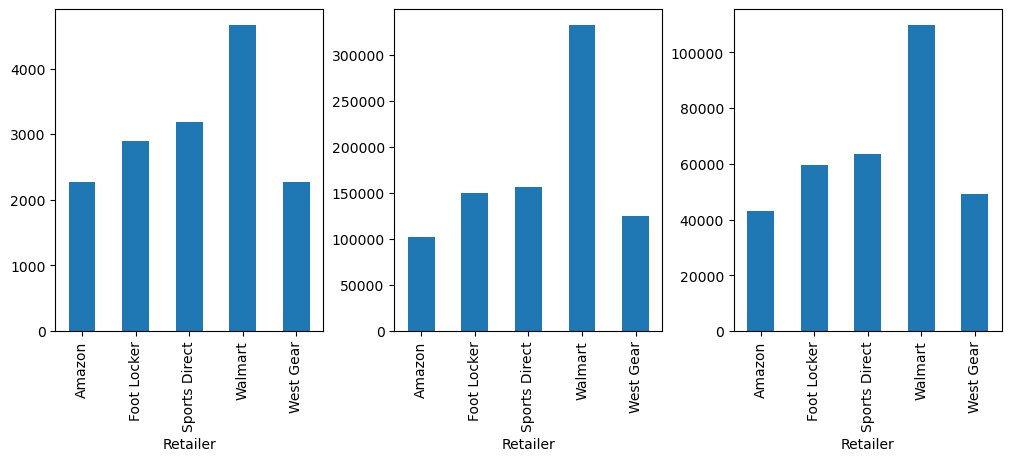

In [23]:
# 5) Southeast > Walmart
Southeast_retailer = df[df["Region"]=="Southeast"].groupby('Retailer').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Southeast_retailer_date = df[df["Region"]=="Southeast"].groupby('Retailer')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Southeast_retailer_df = pd.merge(left=Southeast_retailer, right=Southeast_retailer_date, how='left', on='Retailer')

Southeast_retailer_df['Units Sold_date'] = Southeast_retailer_df['Units Sold']/Southeast_retailer_df['Date Count']
Southeast_retailer_df['Total Sales_date'] = Southeast_retailer_df['Total Sales']/Southeast_retailer_df['Date Count']
Southeast_retailer_df['Operating Profit_date'] = Southeast_retailer_df['Operating Profit']/Southeast_retailer_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Southeast_retailer_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Southeast_retailer_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Southeast_retailer_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Sales Method'>

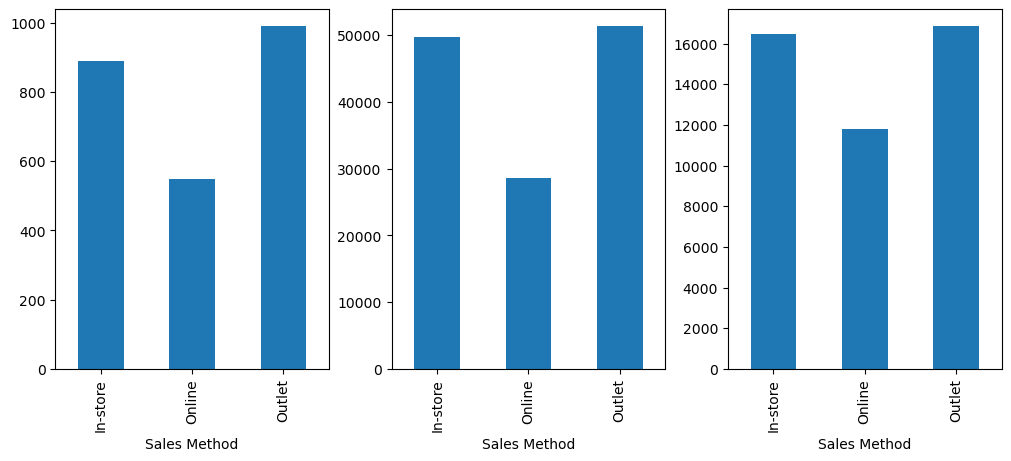

In [24]:
# 2. 지역별 채널
# 1) West > outlet, in-store
west_method = df[df["Region"]=="West"].groupby('Sales Method').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
west_method_date = df[df["Region"]=="West"].groupby('Sales Method')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
west_method_df = pd.merge(left=west_method, right=west_method_date, how='left', on='Sales Method')

west_method_df['Units Sold_date'] = west_method_df['Units Sold']/west_method_df['Date Count']
west_method_df['Total Sales_date'] = west_method_df['Total Sales']/west_method_df['Date Count']
west_method_df['Operating Profit_date'] = west_method_df['Operating Profit']/west_method_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
west_method_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
west_method_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
west_method_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Sales Method'>

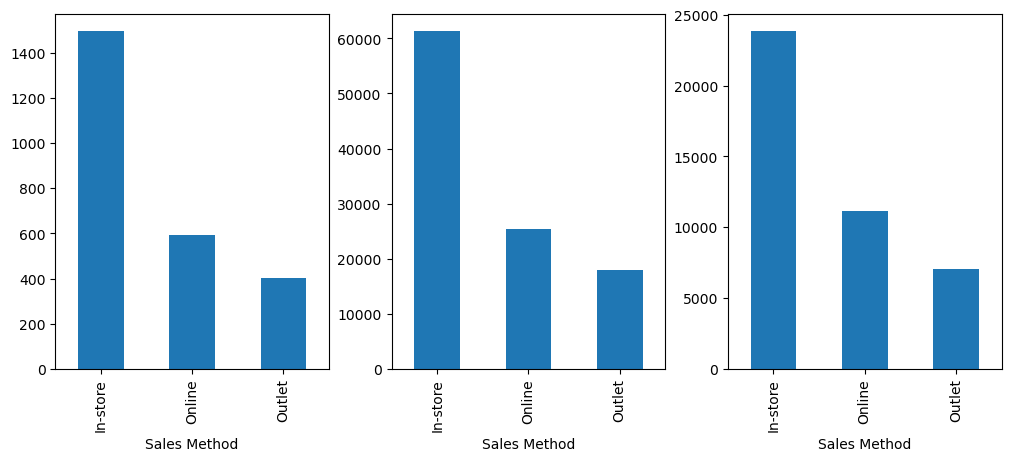

In [25]:
# 2) Midwest > in-store
Midwest_method = df[df["Region"]=="Midwest"].groupby('Sales Method').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Midwest_method_date = df[df["Region"]=="Midwest"].groupby('Sales Method')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Midwest_method_df = pd.merge(left=Midwest_method, right=Midwest_method_date, how='left', on='Sales Method')

Midwest_method_df['Units Sold_date'] = Midwest_method_df['Units Sold']/Midwest_method_df['Date Count']
Midwest_method_df['Total Sales_date'] = Midwest_method_df['Total Sales']/Midwest_method_df['Date Count']
Midwest_method_df['Operating Profit_date'] = Midwest_method_df['Operating Profit']/Midwest_method_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Midwest_method_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Midwest_method_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Midwest_method_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Sales Method'>

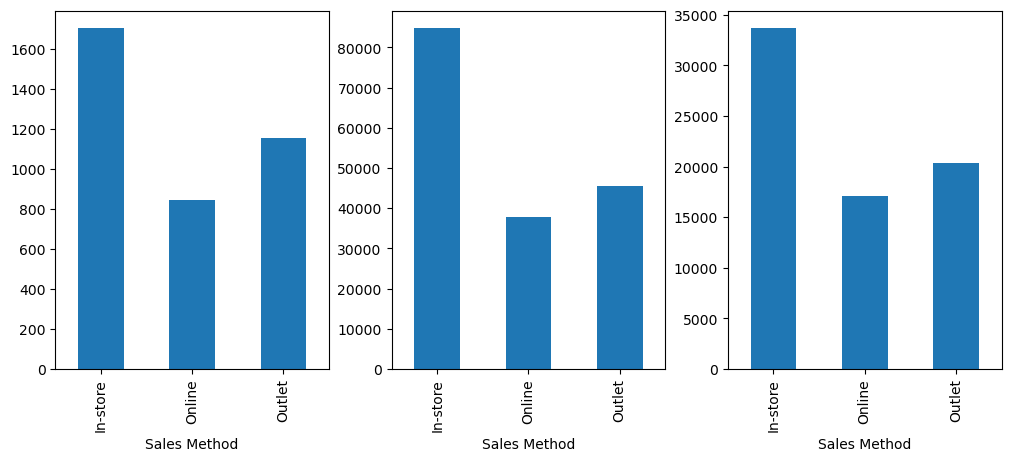

In [26]:
# 3) South > in-store
South_method = df[df["Region"]=="South"].groupby('Sales Method').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
South_method_date = df[df["Region"]=="South"].groupby('Sales Method')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
South_method_df = pd.merge(left=South_method, right=South_method_date, how='left', on='Sales Method')

South_method_df['Units Sold_date'] = South_method_df['Units Sold']/South_method_df['Date Count']
South_method_df['Total Sales_date'] = South_method_df['Total Sales']/South_method_df['Date Count']
South_method_df['Operating Profit_date'] = South_method_df['Operating Profit']/South_method_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
South_method_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
South_method_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
South_method_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

In [32]:
# 4) Northeast > in-store
Northeast_method = df[df["Region"]=="Northeast"].groupby('Sales Method').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Northeast_method_date = df[df["Region"]=="Northeast"].groupby('Sales Method')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Northeast_method_df = pd.merge(left=Northeast_method, right=Northeast_method_date, how='left', on='Sales Method')

Northeast_method_df['Units Sold_date'] = Northeast_method_df['Units Sold']/Northeast_method_df['Date Count']
Northeast_method_df['Total Sales_date'] = Northeast_method_df['Total Sales']/Northeast_method_df['Date Count']
Northeast_method_df['Operating Profit_date'] = Northeast_method_df['Operating Profit']/Northeast_method_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Northeast_method_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Northeast_method_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Northeast_method_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

,Units Sold,Total Sales,Operating Profit,Date Count,Units Sold_date,Total Sales_date,Operating Profit_date
Sales Method,,,,,,,
In-store,229955,11595075.0,4254420.00,96,2395.364583,120782.031250,44316.875000
Online,94150,4626777.0,2246831.65,224,420.312500,20655.254464,10030.498438
Outlet,177174,8856415.0,3231522.25,199,890.321608,44504.597990,16238.805276


<Axes: xlabel='Sales Method'>

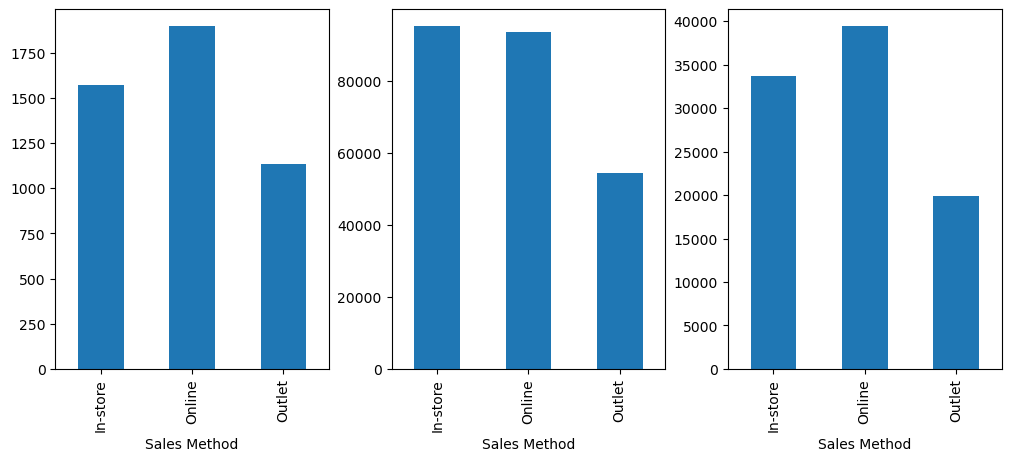

In [31]:
# 5) Southeast > online
Southeast_method = df[df["Region"]=="Southeast"].groupby('Sales Method').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Southeast_method_date = df[df["Region"]=="Southeast"].groupby('Sales Method')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Southeast_method_df = pd.merge(left=Southeast_method, right=Southeast_method_date, how='left', on='Sales Method')

Southeast_method_df['Units Sold_date'] = Southeast_method_df['Units Sold']/Southeast_method_df['Date Count']
Southeast_method_df['Total Sales_date'] = Southeast_method_df['Total Sales']/Southeast_method_df['Date Count']
Southeast_method_df['Operating Profit_date'] = Southeast_method_df['Operating Profit']/Southeast_method_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Southeast_method_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Southeast_method_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Southeast_method_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

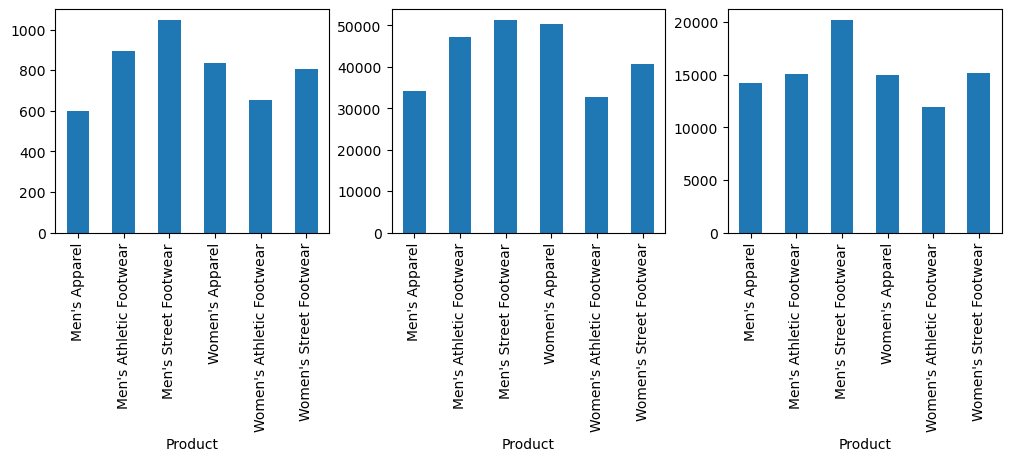

In [33]:
# 3. 지역별 상품
# 1) West
west_product = df[df["Region"]=="West"].groupby('Product').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
west_product_date = df[df["Region"]=="West"].groupby('Product')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
west_product_df = pd.merge(left=west_product, right=west_product_date, how='left', on='Product')

west_product_df['Units Sold_date'] = west_product_df['Units Sold']/west_product_df['Date Count']
west_product_df['Total Sales_date'] = west_product_df['Total Sales']/west_product_df['Date Count']
west_product_df['Operating Profit_date'] = west_product_df['Operating Profit']/west_product_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
west_product_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
west_product_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
west_product_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

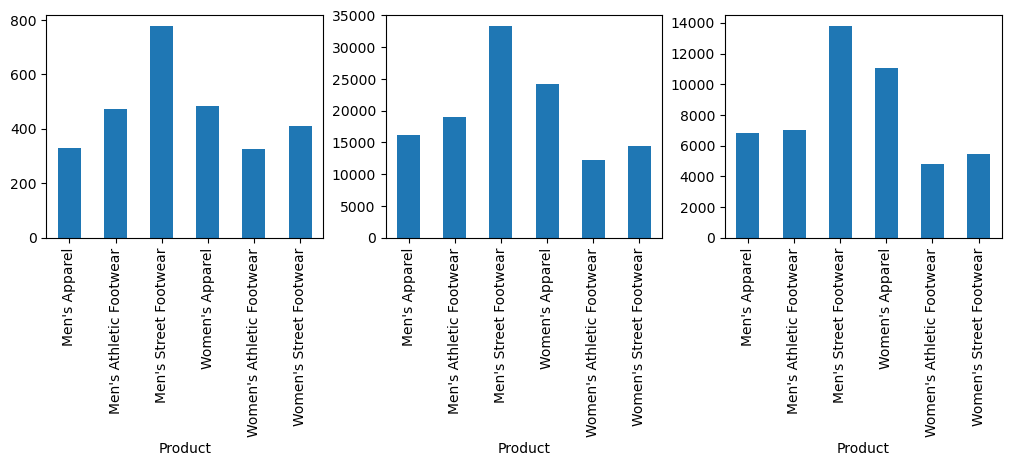

In [34]:
# 2) Midwest > M street
Midwest_product = df[df["Region"]=="Midwest"].groupby('Product').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Midwest_product_date = df[df["Region"]=="Midwest"].groupby('Product')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Midwest_product_df = pd.merge(left=Midwest_product, right=Midwest_product_date, how='left', on='Product')

Midwest_product_df['Units Sold_date'] = Midwest_product_df['Units Sold']/Midwest_product_df['Date Count']
Midwest_product_df['Total Sales_date'] = Midwest_product_df['Total Sales']/Midwest_product_df['Date Count']
Midwest_product_df['Operating Profit_date'] = Midwest_product_df['Operating Profit']/Midwest_product_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Midwest_product_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Midwest_product_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Midwest_product_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

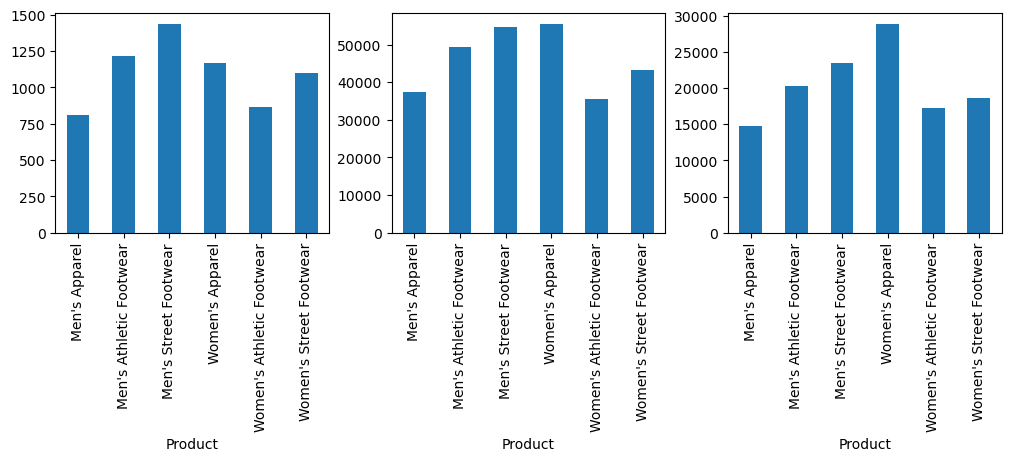

In [35]:
# 3) South
South_product = df[df["Region"]=="South"].groupby('Product').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
South_product_date = df[df["Region"]=="South"].groupby('Product')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
South_product_df = pd.merge(left=South_product, right=South_product_date, how='left', on='Product')

South_product_df['Units Sold_date'] = South_product_df['Units Sold']/South_product_df['Date Count']
South_product_df['Total Sales_date'] = South_product_df['Total Sales']/South_product_df['Date Count']
South_product_df['Operating Profit_date'] = South_product_df['Operating Profit']/South_product_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
South_product_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
South_product_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
South_product_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

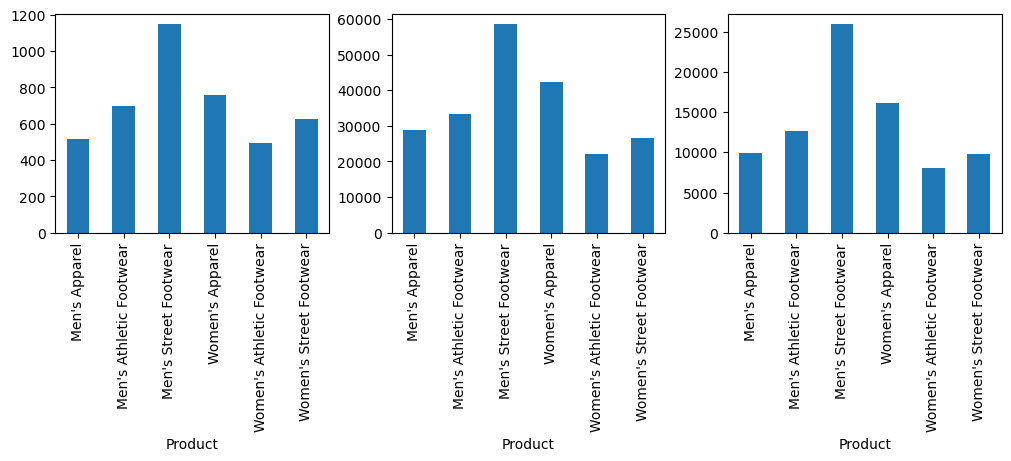

In [36]:
# 4) Northeast > M street
Northeast_product = df[df["Region"]=="Northeast"].groupby('Product').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Northeast_product_date = df[df["Region"]=="Northeast"].groupby('Product')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Northeast_product_df = pd.merge(left=Northeast_product, right=Northeast_product_date, how='left', on='Product')

Northeast_product_df['Units Sold_date'] = Northeast_product_df['Units Sold']/Northeast_product_df['Date Count']
Northeast_product_df['Total Sales_date'] = Northeast_product_df['Total Sales']/Northeast_product_df['Date Count']
Northeast_product_df['Operating Profit_date'] = Northeast_product_df['Operating Profit']/Northeast_product_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Northeast_product_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Northeast_product_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Northeast_product_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

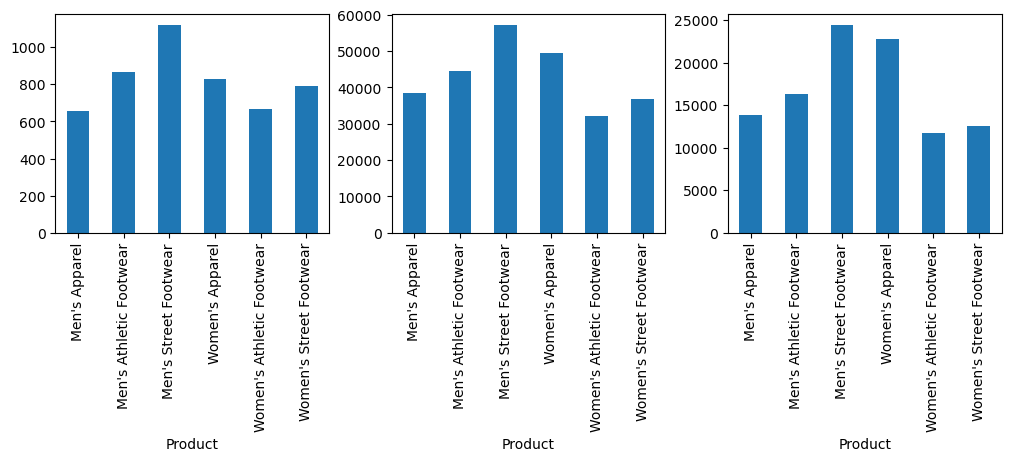

In [37]:
# 5) Southeast
Southeast_product = df[df["Region"]=="Southeast"].groupby('Product').agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
Southeast_product_date = df[df["Region"]=="Southeast"].groupby('Product')['Invoice Date'].nunique().to_frame().rename(columns={'Invoice Date': 'Date Count'})
Southeast_product_df = pd.merge(left=Southeast_product, right=Southeast_product_date, how='left', on='Product')

Southeast_product_df['Units Sold_date'] = Southeast_product_df['Units Sold']/Southeast_product_df['Date Count']
Southeast_product_df['Total Sales_date'] = Southeast_product_df['Total Sales']/Southeast_product_df['Date Count']
Southeast_product_df['Operating Profit_date'] = Southeast_product_df['Operating Profit']/Southeast_product_df['Date Count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Southeast_product_df['Units Sold_date'].plot(kind='bar', ax=axes[0])
Southeast_product_df['Total Sales_date'].plot(kind='bar', ax=axes[1])
Southeast_product_df['Operating Profit_date'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

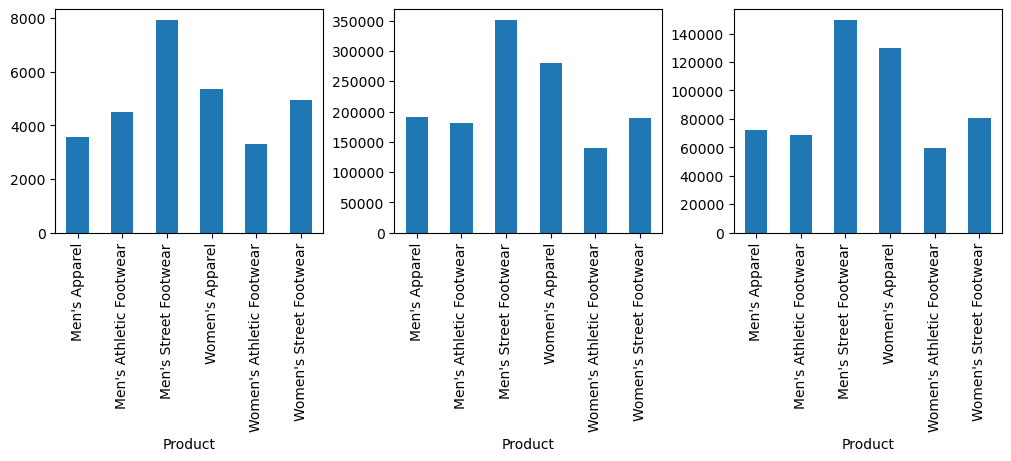

In [2]:
# Southeast 지역의 판매 전략 수립
# 1. 매장 X 상품의 조합
# 1) Amazon
Amazon = df[(df["Region"]=="Southeast") & (df["Retailer"]=="Amazon")].groupby("Product").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Amazon['Units Sold'].plot(kind='bar', ax=axes[0])
Amazon['Total Sales'].plot(kind='bar', ax=axes[1])
Amazon['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

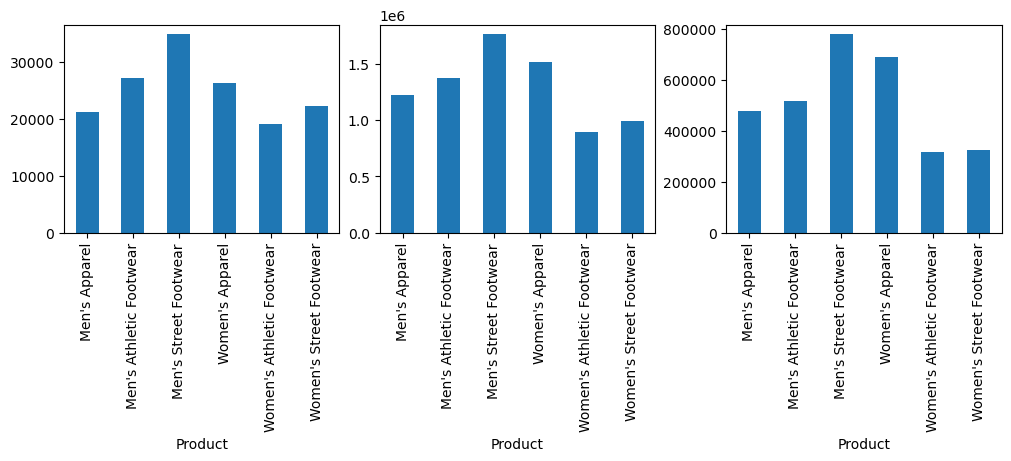

In [3]:
# 2) Foot Locker
Locker = df[(df["Region"]=="Southeast") & (df["Retailer"]=="Foot Locker")].groupby("Product").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Locker['Units Sold'].plot(kind='bar', ax=axes[0])
Locker['Total Sales'].plot(kind='bar', ax=axes[1])
Locker['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

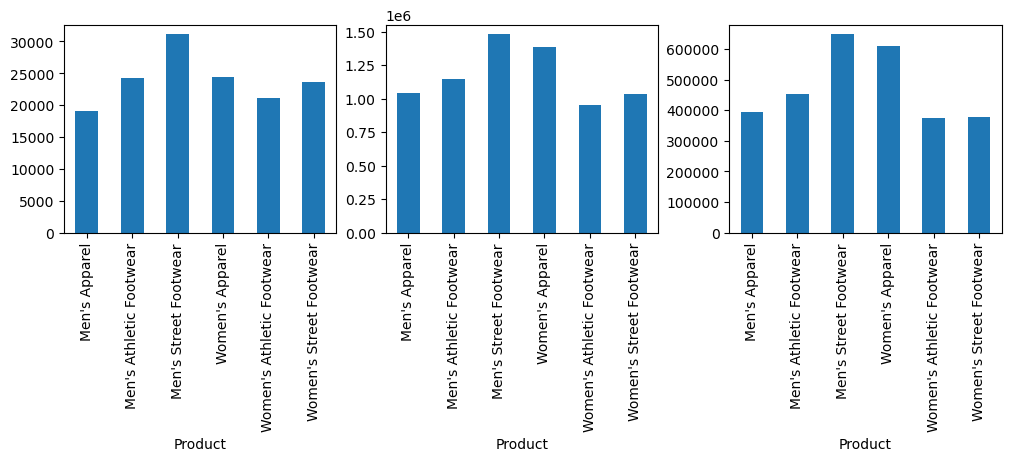

In [9]:
# 3) Sports Direct
Direct = df[(df["Region"]=="Southeast") & (df["Retailer"]=="Sports Direct")].groupby("Product").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Direct['Units Sold'].plot(kind='bar', ax=axes[0])
Direct['Total Sales'].plot(kind='bar', ax=axes[1])
Direct['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

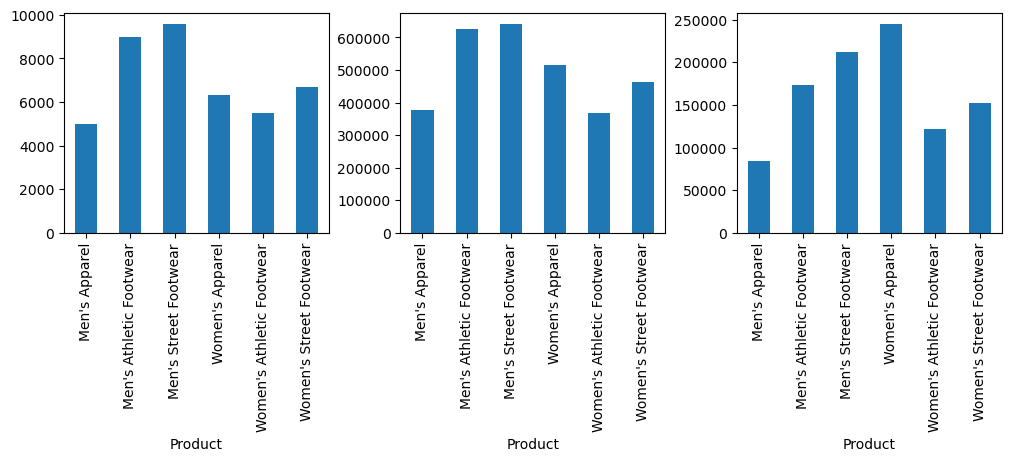

In [10]:
# 4) Walmart
Walmart = df[(df["Region"]=="Southeast") & (df["Retailer"]=="Walmart")].groupby("Product").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Walmart['Units Sold'].plot(kind='bar', ax=axes[0])
Walmart['Total Sales'].plot(kind='bar', ax=axes[1])
Walmart['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

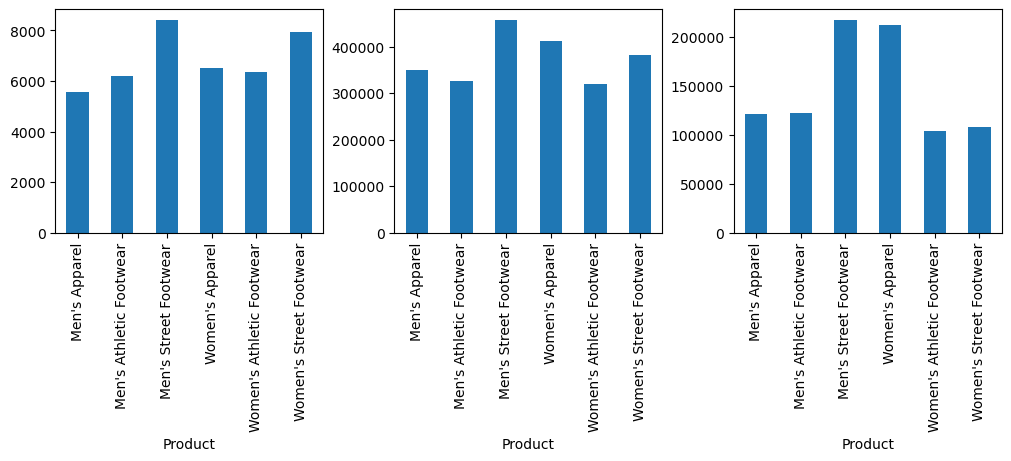

In [11]:
# 5) West Gear
Gear = df[(df["Region"]=="Southeast") & (df["Retailer"]=="West Gear")].groupby("Product").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Gear['Units Sold'].plot(kind='bar', ax=axes[0])
Gear['Total Sales'].plot(kind='bar', ax=axes[1])
Gear['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

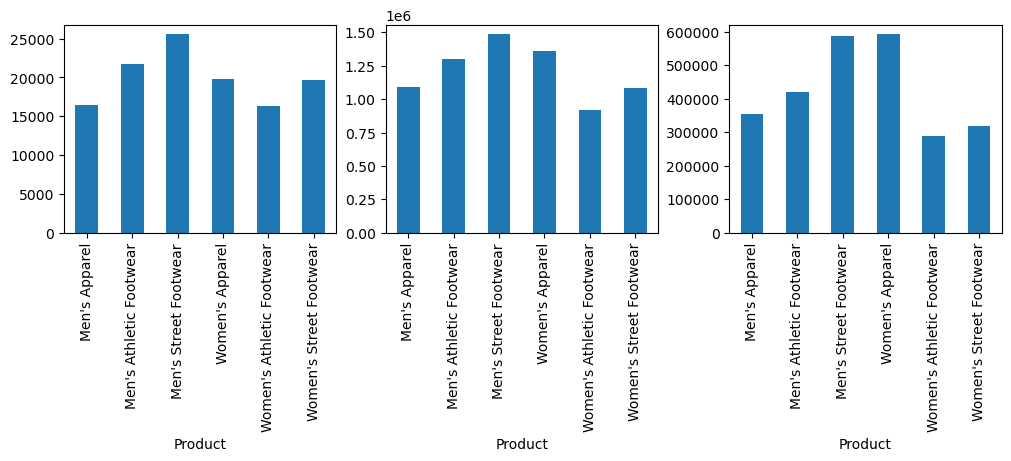

In [16]:
# 2. 채널 X 상품의 조합
# 1) in-store
store = df[(df["Region"]=="Southeast") & (df["Sales Method"]=="In-store")].groupby("Product").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
store['Units Sold'].plot(kind='bar', ax=axes[0])
store['Total Sales'].plot(kind='bar', ax=axes[1])
store['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

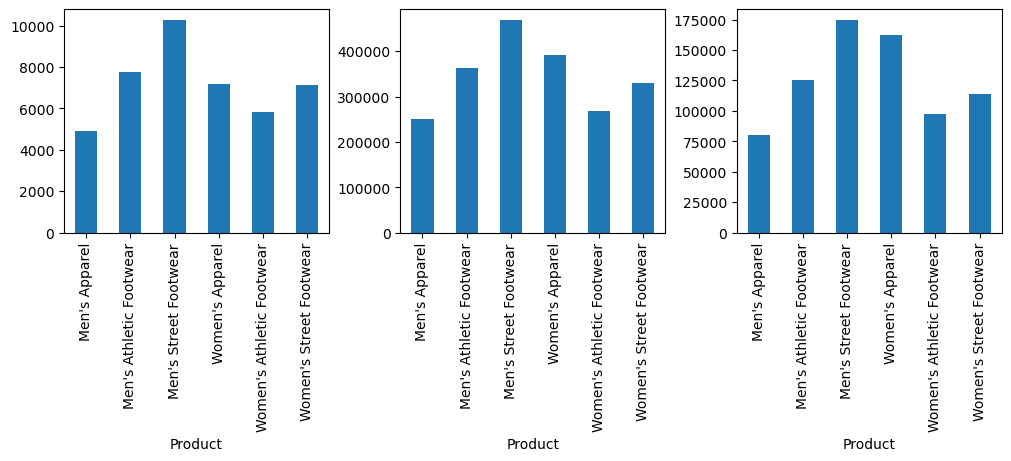

In [13]:
# 2) Outlet
Outlet = df[(df["Region"]=="Southeast") & (df["Sales Method"]=="Outlet")].groupby("Product").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Outlet['Units Sold'].plot(kind='bar', ax=axes[0])
Outlet['Total Sales'].plot(kind='bar', ax=axes[1])
Outlet['Operating Profit'].plot(kind='bar', ax=axes[2])

<Axes: xlabel='Product'>

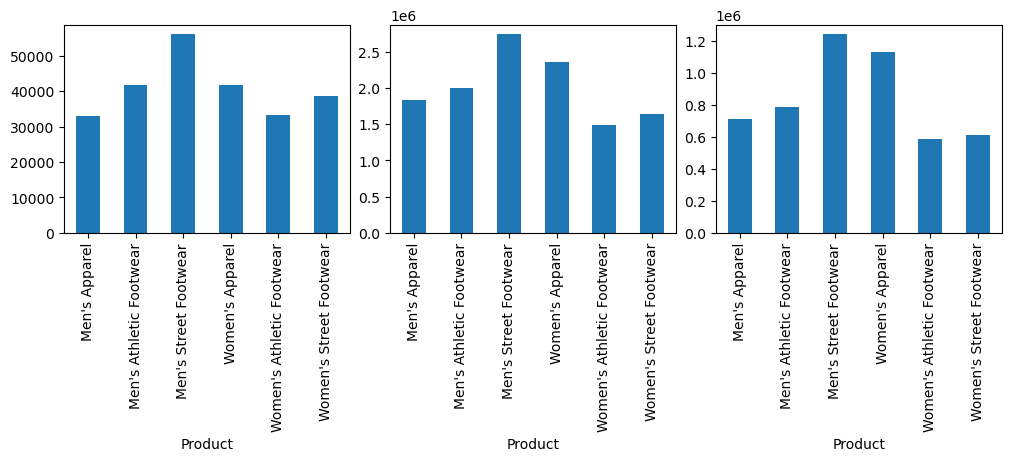

In [20]:
# 3) Online
Online = df[(df["Region"]=="Southeast") & (df["Sales Method"]=="Online")].groupby("Product").agg({'Units Sold': 'sum', 'Total Sales': 'sum', 'Operating Profit': 'sum'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4.5), constrained_layout=True)
Online['Units Sold'].plot(kind='bar', ax=axes[0])
Online['Total Sales'].plot(kind='bar', ax=axes[1])
Online['Operating Profit'].plot(kind='bar', ax=axes[2])